In [431]:
#import libraries and modules
import mne
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import string
sns.set(style="white", font_scale=1)

In [ ]:
import mne_bids
from bids import BIDSLayout

In [ ]:
def get_runs(BIDS_path: str, med_on: bool = True):
    
    layout = BIDSLayout(BIDS_path)
    return layout.get(extension='vhdr',
                      task='Rest', acquisition='StimOff', 
                      session=['EphysMedOn0'+ str(i) if med_on else 'EphysMedOff0'+ str(i) for i in [1,2,3]], 
                      return_type='filename')

In [ ]:
raw_on = IO.get_runs(PATH_BIDS, med_on = True)
raw_off = IO.get_runs(PATH_BIDS, med_on = False)

## Preprocessing

In [446]:
raw = mne.io.read_raw(r'/Users/alidzaye/Library/CloudStorage/OneDrive-SharedLibraries-Charité-UniversitätsmedizinBerlin/Interventional Cognitive Neuromodulation - Data/BIDS_Berlin_ECOG_LFP/rawdata/sub-003/ses-EcogLfpMedOff01/ieeg/sub-003_ses-EcogLfpMedOff01_task-Rest_acq-StimOff_run-1_ieeg.vhdr')
raw_on = mne.io.read_raw(r'/Users/alidzaye/Library/CloudStorage/OneDrive-SharedLibraries-Charité-UniversitätsmedizinBerlin/Interventional Cognitive Neuromodulation - Data/BIDS_Berlin_ECOG_LFP/rawdata/sub-003/ses-EcogLfpMedOff01/ieeg/sub-003_ses-EcogLfpMedOff01_task-Rest_acq-StimOff_run-1_ieeg.vhdr')

Extracting parameters from /Users/alidzaye/Library/CloudStorage/OneDrive-SharedLibraries-Charité-UniversitätsmedizinBerlin/Interventional Cognitive Neuromodulation - Data/BIDS_Berlin_ECOG_LFP/rawdata/sub-003/ses-EcogLfpMedOff01/ieeg/sub-003_ses-EcogLfpMedOff01_task-Rest_acq-StimOff_run-1_ieeg.vhdr...
Setting channel info structure...
Extracting parameters from /Users/alidzaye/Library/CloudStorage/OneDrive-SharedLibraries-Charité-UniversitätsmedizinBerlin/Interventional Cognitive Neuromodulation - Data/BIDS_Berlin_ECOG_LFP/rawdata/sub-003/ses-EcogLfpMedOff01/ieeg/sub-003_ses-EcogLfpMedOff01_task-Rest_acq-StimOff_run-1_ieeg.vhdr...
Setting channel info structure...


In [447]:
# pick ecog channels
raw_ecog = raw.copy().pick_channels(raw.ch_names[10:16])
raw_ecog_on = raw_on.copy().pick_channels(raw_on.ch_names[10:16])

In [448]:
# use bipolar reference
anode = raw_ecog.ch_names[0:5]
cathode = raw_ecog.ch_names[1:6]
new_ch_names = ['ECOG_L_1_2_SMC_AT',
               'ECOG_L_2_3_SMC_AT',
               'ECOG_L_3_4_SMC_AT',
               'ECOG_L_4_5_SMC_AT',
              'ECOG_L_5_6_SMC_AT']

raw_ecog_bi = mne.set_bipolar_reference(raw_ecog.load_data(), anode=anode,
                                        cathode=cathode, ch_name=new_ch_names )

# ON
anode_on = raw_ecog_on.ch_names[0:5]
cathode_on = raw_ecog_on.ch_names[1:6]
new_ch_names = ['ECOG_L_1_2_SMC_AT',
               'ECOG_L_2_3_SMC_AT',
               'ECOG_L_3_4_SMC_AT',
               'ECOG_L_4_5_SMC_AT',
              'ECOG_L_5_6_SMC_AT']

raw_ecog_bi_on = mne.set_bipolar_reference(raw_ecog.load_data(), anode=anode_on,
                                        cathode=cathode_on, ch_name=new_ch_names )

Reading 0 ... 2536497  =      0.000 ...   619.262 secs...
EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=5, n_times=2536498
    Range : 0 ... 2536497 =      0.000 ...   619.262 secs
Ready.
Added the following bipolar channels:
ECOG_L_1_2_SMC_AT, ECOG_L_2_3_SMC_AT, ECOG_L_3_4_SMC_AT, ECOG_L_4_5_SMC_AT, ECOG_L_5_6_SMC_AT
EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=5, n_times=2536498
    Range : 0 ... 2536497 =      0.000 ...   619.262 secs
Ready.
Added the following bipolar channels:
ECOG_L_1_2_SMC_AT, ECOG_L_2_3_SMC_AT, ECOG_L_3_4_SMC_AT, ECOG_L_4_5_SMC_AT, ECOG_L_5_6_SMC_AT


In [449]:
# high pass filtering above 3 Hz
raw_ecog_bi_hi = raw_ecog_bi.copy().filter(3, None,)
raw_ecog_bi_hi_on = raw_ecog_bi_on.copy().filter(3, None,)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 3 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 3.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 2.00 Hz)
- Filter length: 6759 samples (1.650 sec)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 3 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 3.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 2.00 Hz)
- Filter length: 6759 samples (1.650 sec)



In [450]:
# low pass filtering below 250 Hz
raw_ecog_bi_hi_lo = raw_ecog_bi_hi.copy().filter(None, 250)
raw_ecog_bi_hi_lo_on = raw_ecog_bi_hi_on.copy().filter(None, 250)

Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 2.5e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 250.00 Hz
- Upper transition bandwidth: 62.50 Hz (-6 dB cutoff frequency: 281.25 Hz)
- Filter length: 217 samples (0.053 sec)

Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 2.5e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 250.00 Hz
- Upper transition bandwidth: 62.50 Hz (-6 dB cutoff frequency: 281.25 Hz)
- Filter length: 217 samples (0.053 sec)



In [451]:
# bandstop/notch filter 50 Hz
raw_ecog_bi_hi_lo_nf = raw_ecog_bi_hi_lo.copy().notch_filter(np.arange(50,251,50), filter_length="auto", phase='zero')
raw_ecog_bi_hi_lo_nf_on = raw_ecog_bi_hi_lo_on.copy().notch_filter(np.arange(50,251,50), filter_length="auto", phase='zero')

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 27035 samples (6.600 sec)

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 27035 samples (6.600 sec)



In [452]:
#Cropping
raw_ecog_cropped = raw_ecog_bi_hi_lo_nf.copy().crop(tmax=618)
raw_ecog_cropped_on = raw_ecog_bi_hi_lo_nf_on.copy().crop(tmax=420)

In [453]:
#Downsample Data to 250Hz
raw_ecog_cropped_dow = raw_ecog_cropped.copy().resample(250)
raw_ecog_cropped_dow_on = raw_ecog_cropped_on.copy().resample(250)

In [454]:
# get signal
signal = raw_ecog_cropped_dow.copy().get_data()
signal_on = raw_ecog_cropped_dow_on.copy().get_data()

In [455]:
#z-score signal
stand_signal = stats.zscore(signal, axis=1)
stand_signal_on = stats.zscore(signal_on, axis=1)

In [456]:
#Time Frequency estimation 
freqs = np.arange(1,100)
power = mne.decoding.TimeFrequency(freqs, sfreq=250, method='morlet', n_cycles=10, output='power', )
run_TF = power.transform(stand_signal)
run_TF_on = power.transform(stand_signal_on)

## Beta bands of the ecog channels
### low beta(13-20Hz), high beta (20-35Hz), full beta (13-35Hz)

In [457]:
low_beta_1 = run_TF[0, 12:20,:]
high_beta_1 = run_TF[0, 19:35,:]
full_beta_1 = run_TF[0, 12:35,:]

low_beta_2 = run_TF[1, 12:20,:]
high_beta_2 = run_TF[1, 19:35,:]
full_beta_2 = run_TF[1, 12:35,:]

low_beta_3 = run_TF[2, 12:20,:]
high_beta_3 = run_TF[2, 19:35,:]
full_beta_3 = run_TF[2, 12:35,:]

low_beta_4 = run_TF[3, 12:20,:]
high_beta_4 = run_TF[3, 19:35,:]
full_beta_4 = run_TF[3, 12:35,:]

low_beta_5 = run_TF[4, 12:20,:]
high_beta_5 = run_TF[4, 19:35,:]
full_beta_5 = run_TF[4, 12:35,:]

low_beta_1_on = run_TF_on[0, 12:20,:]
high_beta_1_on = run_TF_on[0, 19:35,:]
full_beta_1_on = run_TF_on[0, 12:35,:]

low_beta_2_on = run_TF_on[1, 12:20,:]
high_beta_2_on = run_TF_on[1, 19:35,:]
full_beta_2_on = run_TF_on[1, 12:35,:]

low_beta_3_on = run_TF_on[2, 12:20,:]
high_beta_3_on = run_TF_on[2, 19:35,:]
full_beta_3_on = run_TF_on[2, 12:35,:]

low_beta_4_on = run_TF_on[3, 12:20,:]
high_beta_4_on = run_TF_on[3, 19:35,:]
full_beta_4_on = run_TF_on[3, 12:35,:]

low_beta_5_on = run_TF_on[4, 12:20,:]
high_beta_5_on = run_TF_on[4, 19:35,:]
full_beta_5_on = run_TF_on[4, 12:35,:]

## Averaging power in all beta bands in all ecog channel

In [459]:
low_beta_1_averp = np.mean(low_beta_1, axis=0)
high_beta_1_averp = np.mean(high_beta_1, axis=0)
full_beta_1_averp = np.mean(full_beta_1, axis=0)

low_beta_2_averp = np.mean(low_beta_2, axis=0)
high_beta_2_averp = np.mean(high_beta_2, axis=0)
full_beta_2_averp = np.mean(full_beta_2, axis=0)

low_beta_3_averp = np.mean(low_beta_3, axis=0)
high_beta_3_averp = np.mean(high_beta_3, axis=0)
full_beta_3_averp = np.mean(full_beta_3, axis=0)

low_beta_4_averp = np.mean(low_beta_4, axis=0)
high_beta_4_averp = np.mean(high_beta_4, axis=0)
full_beta_4_averp = np.mean(full_beta_4, axis=0)

low_beta_5_averp = np.mean(low_beta_5, axis=0)
high_beta_5_averp = np.mean(high_beta_5, axis=0)
full_beta_5_averp = np.mean(full_beta_5, axis=0)

low_beta_1_averp_on = np.mean(low_beta_1_on, axis=0)
high_beta_1_averp_on = np.mean(high_beta_1_on, axis=0)
full_beta_1_averp_on = np.mean(full_beta_1_on, axis=0)

low_beta_2_averp_on = np.mean(low_beta_2_on, axis=0)
high_beta_2_averp_on = np.mean(high_beta_2_on, axis=0)
full_beta_2_averp_on = np.mean(full_beta_2_on, axis=0)

low_beta_3_averp_on = np.mean(low_beta_3_on, axis=0)
high_beta_3_averp_on = np.mean(high_beta_3_on, axis=0)
full_beta_3_averp_on = np.mean(full_beta_3_on, axis=0)

low_beta_4_averp_on = np.mean(low_beta_4_on, axis=0)
high_beta_4_averp_on = np.mean(high_beta_4_on, axis=0)
full_beta_4_averp_on = np.mean(full_beta_4_on, axis=0)

low_beta_5_averp_on = np.mean(low_beta_5_on, axis=0)
high_beta_5_averp_on = np.mean(high_beta_5_on, axis=0)
full_beta_5_averp_on = np.mean(full_beta_5_on, axis=0)

## Z-Scored averaged beta traces

In [462]:
low_beta_1_averp_norm = stats.zscore(low_beta_1_averp, axis=0)
high_beta_1_averp_norm = stats.zscore(high_beta_1_averp, axis=0)
full_beta_1_averp_norm = stats.zscore(full_beta_1_averp, axis=0)

low_beta_2_averp_norm = stats.zscore(low_beta_2_averp, axis=0)
high_beta_2_averp_norm = stats.zscore(high_beta_2_averp, axis=0)
full_beta_2_averp_norm = stats.zscore(full_beta_2_averp, axis=0)

low_beta_3_averp_norm = stats.zscore(low_beta_3_averp, axis=0)
high_beta_3_averp_norm = stats.zscore(high_beta_3_averp, axis=0)
full_beta_3_averp_norm = stats.zscore(full_beta_3_averp, axis=0)

low_beta_4_averp_norm = stats.zscore(low_beta_4_averp, axis=0)
high_beta_4_averp_norm = stats.zscore(high_beta_4_averp, axis=0)
full_beta_4_averp_norm = stats.zscore(full_beta_4_averp, axis=0)

low_beta_5_averp_norm = stats.zscore(low_beta_5_averp, axis=0)
high_beta_5_averp_norm = stats.zscore(high_beta_5_averp, axis=0)
full_beta_5_averp_norm = stats.zscore(full_beta_5_averp, axis=0)

low_beta_1_averp_norm_on = stats.zscore(low_beta_1_averp_on, axis=0)
high_beta_1_averp_norm_on = stats.zscore(high_beta_1_averp_on, axis=0)
full_beta_1_averp_norm_on = stats.zscore(full_beta_1_averp_on, axis=0)

low_beta_2_averp_norm_on = stats.zscore(low_beta_2_averp_on, axis=0)
high_beta_2_averp_norm_on = stats.zscore(high_beta_2_averp_on, axis=0)
full_beta_2_averp_norm_on = stats.zscore(full_beta_2_averp_on, axis=0)

low_beta_3_averp_norm_on = stats.zscore(low_beta_3_averp_on, axis=0)
high_beta_3_averp_norm_on = stats.zscore(high_beta_3_averp_on, axis=0)
full_beta_3_averp_norm_on = stats.zscore(full_beta_3_averp_on, axis=0)

low_beta_4_averp_norm_on = stats.zscore(low_beta_4_averp_on, axis=0)
high_beta_4_averp_norm_on = stats.zscore(high_beta_4_averp_on, axis=0)
full_beta_4_averp_norm_on = stats.zscore(full_beta_4_averp_on, axis=0)

low_beta_5_averp_norm_on = stats.zscore(low_beta_5_averp_on, axis=0)
high_beta_5_averp_norm_on = stats.zscore(high_beta_5_averp_on, axis=0)
full_beta_5_averp_norm_on = stats.zscore(full_beta_5_averp_on, axis=0)

## 75th percentile of these vectors 

In [463]:
low_beta_1_thr = np.percentile(low_beta_1_averp_norm, 75)
high_beta_1_thr = np.percentile(high_beta_1_averp_norm, 75)
full_beta_1_thr = np.percentile(full_beta_1_averp_norm, 75)

low_beta_2_thr = np.percentile(low_beta_2_averp_norm, 75)
high_beta_2_thr = np.percentile(high_beta_2_averp_norm, 75)
full_beta_2_thr = np.percentile(full_beta_2_averp_norm, 75)

low_beta_3_thr = np.percentile(low_beta_3_averp_norm, 75)
high_beta_3_thr = np.percentile(high_beta_3_averp_norm, 75)
full_beta_3_thr = np.percentile(full_beta_3_averp_norm, 75)

low_beta_4_thr = np.percentile(low_beta_4_averp_norm, 75)
high_beta_4_thr = np.percentile(high_beta_4_averp_norm, 75)
full_beta_4_thr = np.percentile(full_beta_4_averp_norm, 75)

low_beta_5_thr = np.percentile(low_beta_5_averp_norm, 75)
high_beta_5_thr = np.percentile(high_beta_5_averp_norm, 75)
full_beta_5_thr = np.percentile(full_beta_5_averp_norm, 75)

low_beta_1_thr_on = np.percentile(low_beta_1_averp_norm_on, 75)
high_beta_1_thr_on = np.percentile(high_beta_1_averp_norm_on, 75)
full_beta_1_thr_on = np.percentile(full_beta_1_averp_norm_on, 75)

low_beta_2_thr_on = np.percentile(low_beta_2_averp_norm_on, 75)
high_beta_2_thr_on = np.percentile(high_beta_2_averp_norm_on, 75)
full_beta_2_thr_on = np.percentile(full_beta_2_averp_norm_on, 75)

low_beta_3_thr_on = np.percentile(low_beta_3_averp_norm_on, 75)
high_beta_3_thr_on = np.percentile(high_beta_3_averp_norm_on, 75)
full_beta_3_thr_on = np.percentile(full_beta_3_averp_norm_on, 75)

low_beta_4_thr_on = np.percentile(low_beta_4_averp_norm_on, 75)
high_beta_4_thr_on = np.percentile(high_beta_4_averp_norm_on, 75)
full_beta_4_thr_on = np.percentile(full_beta_4_averp_norm_on, 75)

low_beta_5_thr_on = np.percentile(low_beta_5_averp_norm_on, 75)
high_beta_5_thr_on = np.percentile(high_beta_5_averp_norm_on, 75)
full_beta_5_thr_on = np.percentile(full_beta_5_averp_norm_on, 75)

# Analysing the duration of beta burst 


In [464]:
def get_burst_length(beta_averp_norm,beta_thr, sfreq=250):
    deriv = np.diff (beta_averp_norm >= beta_thr) 
    isburst = False
    burst_length = []
    burst_start = 0

    for index, i in enumerate(deriv):
        if i == True:
            if isburst == True:
                burst_length.append(index - burst_start)

                isburst = False
            else:
                burst_start = index
                isburst = True
    burst_length = np.array(burst_length)/sfreq
    
    return burst_length   

## burst_length of full beta in all ECOG channels

In [507]:
burst_length_1 = get_burst_length(full_beta_1_averp_norm,full_beta_1_thr, sfreq = 250)
burst_length_2 = get_burst_length(full_beta_2_averp_norm,full_beta_2_thr, sfreq = 250)
burst_length_3 = get_burst_length(full_beta_3_averp_norm,full_beta_3_thr, sfreq = 250)
burst_length_4 = get_burst_length(full_beta_4_averp_norm,full_beta_4_thr, sfreq = 250)
burst_length_5 = get_burst_length(full_beta_5_averp_norm,full_beta_5_thr, sfreq = 250)

burst_length_1_on = get_burst_length(full_beta_1_averp_norm_on,full_beta_1_thr_on, sfreq = 250)
burst_length_2_on = get_burst_length(full_beta_2_averp_norm_on,full_beta_2_thr_on, sfreq = 250)
burst_length_3_on = get_burst_length(full_beta_3_averp_norm_on,full_beta_3_thr_on, sfreq = 250)
burst_length_4_on = get_burst_length(full_beta_4_averp_norm_on,full_beta_4_thr_on, sfreq = 250)
burst_length_5_on = get_burst_length(full_beta_5_averp_norm_on,full_beta_5_thr_on, sfreq = 250)

In [508]:
burst_duration_1 = [ i for i in burst_length_1 if i >= 0.1]
burst_duration_2 = [ i for i in burst_length_2 if i >= 0.1]
burst_duration_3 = [ i for i in burst_length_3 if i >= 0.1]
burst_duration_4 = [ i for i in burst_length_4 if i >= 0.1]
burst_duration_5 = [ i for i in burst_length_5 if i >= 0.1]

burst_duration_1_on = [ i for i in burst_length_1_on if i >= 0.1]
burst_duration_2_on = [ i for i in burst_length_2_on if i >= 0.1]
burst_duration_3_on = [ i for i in burst_length_3_on if i >= 0.1]
burst_duration_4_on = [ i for i in burst_length_4_on if i >= 0.1]
burst_duration_5_on = [ i for i in burst_length_5_on if i >= 0.1]

## Histogram of burst duration

In [509]:
hist_dur_1, bins = np.histogram(burst_duration_1,density=False, bins=20, range=(0, 2))
hist_dur_2, bins = np.histogram(burst_duration_2,density=False, bins=20, range=(0, 2))
hist_dur_3, bins = np.histogram(burst_duration_3,density=False, bins=20, range=(0, 2))
hist_dur_4, bins = np.histogram(burst_duration_4,density=False, bins=20, range=(0, 2))
hist_dur_5, bins = np.histogram(burst_duration_5,density=False, bins=20, range=(0, 2))

hist_dur_1_on, bins = np.histogram(burst_duration_1_on,density=False, bins=20, range=(0, 2))
hist_dur_2_on, bins = np.histogram(burst_duration_2_on,density=False, bins=20, range=(0, 2))
hist_dur_3_on, bins = np.histogram(burst_duration_3_on,density=False, bins=20, range=(0, 2))
hist_dur_4_on, bins = np.histogram(burst_duration_4_on,density=False, bins=20, range=(0, 2))
hist_dur_5_on, bins = np.histogram(burst_duration_5_on,density=False, bins=20, range=(0, 2))

In [511]:
burst_length_1.shape[0]

734

In [512]:
len(burst_duration_1)

522

## Normed Histogram of burst duration

In [513]:
normed_hist_1 = 100*hist_dur_1 / len(burst_duration_1)
normed_hist_2 = 100*hist_dur_2 / len(burst_duration_2)
normed_hist_3= 100*hist_dur_3 / len(burst_duration_3)
normed_hist_4= 100*hist_dur_4 / len(burst_duration_4)
normed_hist_5 = 100*hist_dur_5 / len(burst_duration_5)

normed_hist_1_on = 100*hist_dur_1_on / len(burst_duration_1_on)
normed_hist_2_on = 100*hist_dur_2_on / len(burst_duration_2_on)
normed_hist_3_on = 100*hist_dur_3_on / len(burst_duration_3_on)
normed_hist_4_on = 100*hist_dur_4_on / len(burst_duration_4_on)
normed_hist_5_on = 100*hist_dur_5_on / len(burst_duration_5_on)

# ECOG Biomarker comparison

## Power Spectral Density | Figure 1A

In [514]:
power_spectrum_for_channel_0 = np.nanmean(np.squeeze(run_TF[0,:,:]), axis=1)
power_spectrum_for_channel_1 = np.nanmean(np.squeeze(run_TF[1,:,:]), axis=1)
power_spectrum_for_channel_2 = np.nanmean(np.squeeze(run_TF[2,:,:]), axis=1)
power_spectrum_for_channel_3 = np.nanmean(np.squeeze(run_TF[3,:,:]), axis=1)
power_spectrum_for_channel_4 = np.nanmean(np.squeeze(run_TF[4,:,:]), axis=1)

power_spectrum_for_channel_0_on = np.nanmean(np.squeeze(run_TF_on[0,:,:]), axis=1)
power_spectrum_for_channel_1_on = np.nanmean(np.squeeze(run_TF_on[1,:,:]), axis=1)
power_spectrum_for_channel_2_on = np.nanmean(np.squeeze(run_TF_on[2,:,:]), axis=1)
power_spectrum_for_channel_3_on = np.nanmean(np.squeeze(run_TF_on[3,:,:]), axis=1)
power_spectrum_for_channel_4_on = np.nanmean(np.squeeze(run_TF_on[4,:,:]), axis=1)

In [515]:
npow_0 = power_spectrum_for_channel_0/np.sum(power_spectrum_for_channel_0[4:45] + power_spectrum_for_channel_0[54:95])
npow_1 = power_spectrum_for_channel_1/np.sum(power_spectrum_for_channel_1[4:45] + power_spectrum_for_channel_1[54:95])
npow_2 = power_spectrum_for_channel_2/np.sum(power_spectrum_for_channel_2[4:45] + power_spectrum_for_channel_2[54:95])
npow_3 = power_spectrum_for_channel_3/np.sum(power_spectrum_for_channel_3[4:45] + power_spectrum_for_channel_3[54:95])
npow_4 = power_spectrum_for_channel_4/np.sum(power_spectrum_for_channel_4[4:45] + power_spectrum_for_channel_4[54:95])

npow_0_on = power_spectrum_for_channel_0_on/np.sum(power_spectrum_for_channel_0_on[4:45] + power_spectrum_for_channel_0_on[54:95])
npow_1_on = power_spectrum_for_channel_1_on/np.sum(power_spectrum_for_channel_1_on[4:45] + power_spectrum_for_channel_1_on[54:95])
npow_2_on = power_spectrum_for_channel_2_on/np.sum(power_spectrum_for_channel_2_on[4:45] + power_spectrum_for_channel_2_on[54:95])
npow_3_on = power_spectrum_for_channel_3_on/np.sum(power_spectrum_for_channel_3_on[4:45] + power_spectrum_for_channel_3_on[54:95])
npow_4_on = power_spectrum_for_channel_4_on/np.sum(power_spectrum_for_channel_4_on[4:45] + power_spectrum_for_channel_4_on[54:95])

## Normed Histogram of Duration 1B

In [528]:
prob_lg_bursts_1=normed_hist_1[np.arange(8,20,1)].sum()
prob_lg_bursts_1_on=normed_hist_1_on[np.arange(8,20,1)].sum()

prob_lg_bursts_2=normed_hist_2[np.arange(8,20,1)].sum()
prob_lg_bursts_2_on=normed_hist_2_on[np.arange(8,20,1)].sum()

prob_lg_bursts_3=normed_hist_3[np.arange(8,20,1)].sum()
prob_lg_bursts_3_on=normed_hist_3_on[np.arange(8,20,1)].sum()

prob_lg_bursts_4=normed_hist_4[np.arange(8,20,1)].sum()
prob_lg_bursts_4_on=normed_hist_4_on[np.arange(8,20,1)].sum()

prob_lg_bursts_5=normed_hist_5[np.arange(8,20,1)].sum()
prob_lg_bursts_5_on=normed_hist_5_on[np.arange(8,20,1)].sum()

In [553]:
array_ot_bursts_1 = normed_hist_1[np.arange(0,8)]
array_ot_bursts_1_on = normed_hist_1_on[np.arange(0,8)]
arr_sh_bursts_1 = np.delete(array_ot_bursts_1,0)
arr_sh_bursts_1_on = np.delete(array_ot_bursts_1_on,0)

array_ot_bursts_2 = normed_hist_2[np.arange(0,8)]
array_ot_bursts_2_on = normed_hist_2_on[np.arange(0,8)]
arr_sh_bursts_2 = np.delete(array_ot_bursts_2,0)
arr_sh_bursts_2_on = np.delete(array_ot_bursts_2_on,0)

array_ot_bursts_3 = normed_hist_3[np.arange(0,8)]
array_ot_bursts_3_on = normed_hist_3_on[np.arange(0,8)]
arr_sh_bursts_3 = np.delete(array_ot_bursts_3,0)
arr_sh_bursts_3_on = np.delete(array_ot_bursts_3_on,0)

array_ot_bursts_4 = normed_hist_4[np.arange(0,8)]
array_ot_bursts_4_on = normed_hist_4_on[np.arange(0,8)]
arr_sh_bursts_4 = np.delete(array_ot_bursts_4,0)
arr_sh_bursts_4_on = np.delete(array_ot_bursts_4_on,0)

array_ot_bursts_5 = normed_hist_5[np.arange(0,8)]
array_ot_bursts_5_on = normed_hist_5_on[np.arange(0,8)]
arr_sh_bursts_5 = np.delete(array_ot_bursts_5,0)
arr_sh_bursts_5_on = np.delete(array_ot_bursts_5_on,0)

In [554]:
arr_sh_bursts_3

array([52.65957447, 23.22695035, 10.9929078 ,  5.67375887,  2.30496454,
        2.12765957,  1.24113475])

In [556]:
burst_prob_dur_1 = np.append(arr_sh_bursts_1,prob_lg_bursts_1)
burst_prob_dur_1_on = np.append(arr_sh_bursts_1_on,prob_lg_bursts_1_on)

burst_prob_dur_2 = np.append(arr_sh_bursts_2,prob_lg_bursts_2)
burst_prob_dur_2_on = np.append(arr_sh_bursts_2_on,prob_lg_bursts_2_on)

burst_prob_dur_3 = np.append(arr_sh_bursts_3,prob_lg_bursts_3)
burst_prob_dur_3_on = np.append(arr_sh_bursts_3_on,prob_lg_bursts_3_on)

burst_prob_dur_4 = np.append(arr_sh_bursts_4,prob_lg_bursts_4)
burst_prob_dur_4_on = np.append(arr_sh_bursts_4_on,prob_lg_bursts_4_on)

burst_prob_dur_5 = np.append(arr_sh_bursts_5,prob_lg_bursts_5)
burst_prob_dur_5_on = np.append(arr_sh_bursts_5_on,prob_lg_bursts_5_on)

In [557]:
bins_dur=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,'>0.8'] 

In [558]:
df_probdur_1 = pd.DataFrame(data=[bins_dur,burst_prob_dur_1]) 
df_probdur_1_on = pd.DataFrame(data=[bins_dur,burst_prob_dur_1_on]) 

df_probdur_2 = pd.DataFrame(data=[bins_dur,burst_prob_dur_2]) 
df_probdur_2_on = pd.DataFrame(data=[bins_dur,burst_prob_dur_2_on]) 

df_probdur_3 = pd.DataFrame(data=[bins_dur,burst_prob_dur_3]) 
df_probdur_3_on = pd.DataFrame(data=[bins_dur,burst_prob_dur_3_on]) 

df_probdur_4 = pd.DataFrame(data=[bins_dur,burst_prob_dur_4]) 
df_probdur_4_on = pd.DataFrame(data=[bins_dur,burst_prob_dur_4_on]) 

df_probdur_5 = pd.DataFrame(data=[bins_dur,burst_prob_dur_5]) 
df_probdur_5_on = pd.DataFrame(data=[bins_dur,burst_prob_dur_5_on]) 

In [559]:
df_probdur_t_1 =df_probdur_1.T
df_probdur_t_1_on =df_probdur_1_on.T

df_probdur_t_2 =df_probdur_2.T
df_probdur_t_2_on =df_probdur_2_on.T

df_probdur_t_3 =df_probdur_3.T
df_probdur_t_3_on =df_probdur_3_on.T

df_probdur_t_4 =df_probdur_4.T
df_probdur_t_4_on =df_probdur_4_on.T

df_probdur_t_5 =df_probdur_5.T
df_probdur_t_5_on =df_probdur_5_on.T

In [560]:
df_probdur_t_r_1 = df_probdur_t_1.rename(columns={0: "Burst Duration (s)",1:'Burst Probability (%)'})
df_probdur_t_r_1_on = df_probdur_t_1_on.rename(columns={0: "Burst Duration (s)",1:'Burst Probability (%)'})

df_probdur_t_r_2 = df_probdur_t_2.rename(columns={0: "Burst Duration (s)",1:'Burst Probability (%)'})
df_probdur_t_r_2_on = df_probdur_t_2_on.rename(columns={0: "Burst Duration (s)",1:'Burst Probability (%)'})

df_probdur_t_r_3 = df_probdur_t_3.rename(columns={0: "Burst Duration (s)",1:'Burst Probability (%)'})
df_probdur_t_r_3_on = df_probdur_t_3_on.rename(columns={0: "Burst Duration (s)",1:'Burst Probability (%)'})

df_probdur_t_r_4 = df_probdur_t_4.rename(columns={0: "Burst Duration (s)",1:'Burst Probability (%)'})
df_probdur_t_r_4_on = df_probdur_t_4_on.rename(columns={0: "Burst Duration (s)",1:'Burst Probability (%)'})

df_probdur_t_r_5 = df_probdur_t_5.rename(columns={0: "Burst Duration (s)",1:'Burst Probability (%)'})
df_probdur_t_r_5_on = df_probdur_t_5_on.rename(columns={0: "Burst Duration (s)",1:'Burst Probability (%)'})

In [561]:
df_probdur_t_r_m_1 = df_probdur_t_r_1.assign(Medication = 'OFF')
df_probdur_t_r_m_1_on = df_probdur_t_r_1_on.assign(Medication = 'ON')

df_probdur_t_r_m_2 = df_probdur_t_r_2.assign(Medication = 'OFF')
df_probdur_t_r_m_2_on = df_probdur_t_r_2_on.assign(Medication = 'ON')

df_probdur_t_r_m_3 = df_probdur_t_r_3.assign(Medication = 'OFF')
df_probdur_t_r_m_3_on = df_probdur_t_r_3_on.assign(Medication = 'ON')

df_probdur_t_r_m_4 = df_probdur_t_r_4.assign(Medication = 'OFF')
df_probdur_t_r_m_4_on = df_probdur_t_r_4_on.assign(Medication = 'ON')

df_probdur_t_r_m_5 = df_probdur_t_r_5.assign(Medication = 'OFF')
df_probdur_t_r_m_5_on = df_probdur_t_r_5_on.assign(Medication = 'ON')

In [562]:
cdf_probdur_1 = pd.concat([df_probdur_t_r_m_1, df_probdur_t_r_m_1_on])
cdf_probdur_2 = pd.concat([df_probdur_t_r_m_2, df_probdur_t_r_m_2_on])
cdf_probdur_3 = pd.concat([df_probdur_t_r_m_3, df_probdur_t_r_m_3_on])
cdf_probdur_4 = pd.concat([df_probdur_t_r_m_4, df_probdur_t_r_m_4_on])
cdf_probdur_5 = pd.concat([df_probdur_t_r_m_5, df_probdur_t_r_m_5_on])

In [563]:
cdf_probdur_4

,Burst Duration (s),Burst Probability (%),Medication
0,0.1,49.192101,OFF
1,0.2,26.929982,OFF
2,0.3,8.976661,OFF
3,0.4,7.360862,OFF
4,0.5,3.770197,OFF
5,0.6,1.256732,OFF
6,0.7,0.5386,OFF
7,>0.8,1.974865,OFF
0,0.1,51.546392,ON
1,0.2,26.030928,ON


## Mean Duration 1C

In [583]:
df4 = pd.DataFrame(burst_duration_4)
df4_on = pd.DataFrame(burst_duration_4_on) 

In [584]:
df4_m = df4.assign(Location ='ECOG_L4-L5_SMC_AT',Medication = 'OFF')
df4_m_on = df4_on.assign(Location ='ECOG_L4-L5_SMC_AT',Medication = 'ON')

In [585]:
df4_m_r = df4_m.rename(columns={0: "Burst Duration (s)"})
df4_m_r_on = df4_m_on.rename(columns={0: "Burst Duration (s)"})

In [586]:
cdf4 = pd.concat([df4_m_r,df4_m_r_on])

In [587]:
cdf4

,Burst Duration (s),Location,Medication
0,0.132,ECOG_L4-L5_SMC_AT,OFF
1,0.968,ECOG_L4-L5_SMC_AT,OFF
2,0.772,ECOG_L4-L5_SMC_AT,OFF
3,0.912,ECOG_L4-L5_SMC_AT,OFF
4,0.268,ECOG_L4-L5_SMC_AT,OFF
...,...,...,...
383,0.220,ECOG_L4-L5_SMC_AT,ON
384,0.180,ECOG_L4-L5_SMC_AT,ON
385,0.252,ECOG_L4-L5_SMC_AT,ON
386,0.460,ECOG_L4-L5_SMC_AT,ON


# Figure

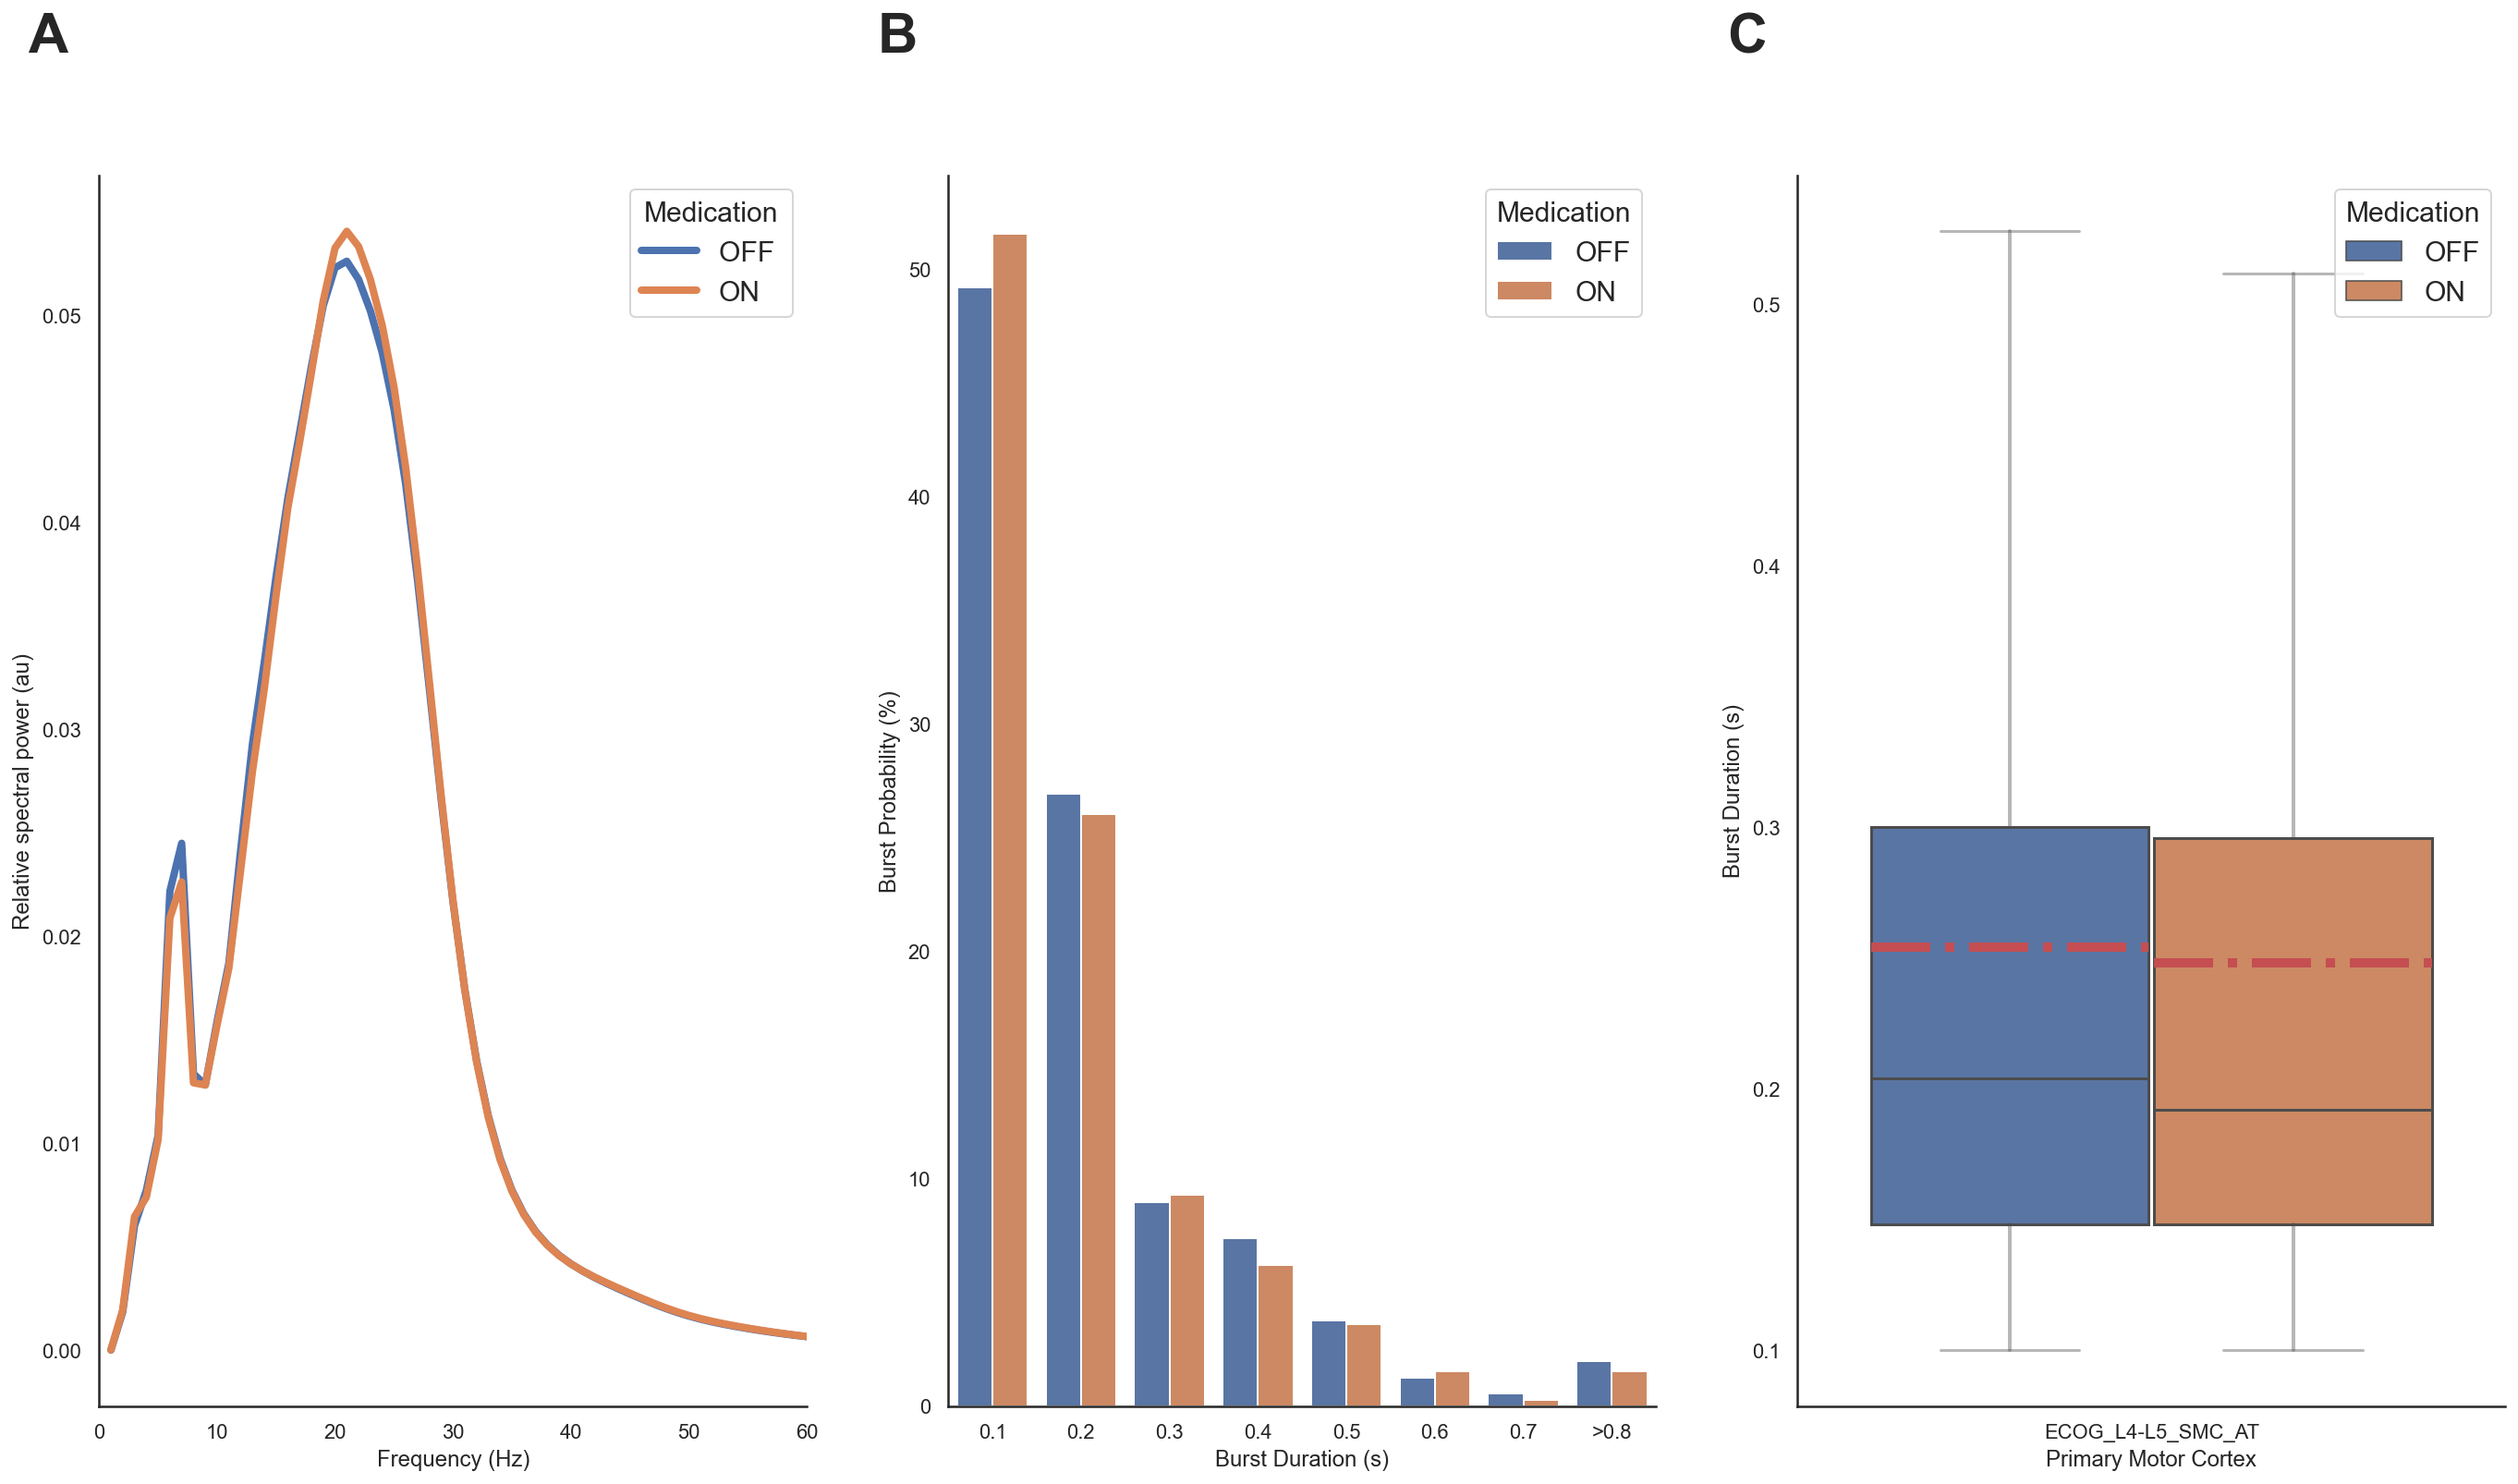

In [588]:
fig,ax = plt.subplots(1,3, figsize=(25,15),)
plt.subplot(131)
plt.plot(freqs,npow_3,label= 'OFF ',linewidth=4)
plt.plot(freqs,npow_3_on,label= 'ON',linewidth=4)
plt.xlim(0,60)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Relative spectral power (au)')
plt.legend(title='Medication', fontsize=15,title_fontsize=15)
        
plt.subplot(132)           
alpha_box=0.3
sns.barplot(data=cdf_probdur_4, x='Burst Duration (s)', y='Burst Probability (%)', hue='Medication') 
plt.legend(title='Medication', fontsize=15,title_fontsize=15)


plt.subplot(133)
alpha_box = 0.4
g = sns.boxplot(x='Location', y='Burst Duration (s)', hue='Medication',data=cdf4,         
           showfliers=False,meanline=dict(color='r'), showmeans=True,
           whiskerprops={'linewidth':2, "zorder":10, "alpha":alpha_box},
           capprops={"alpha":alpha_box},
           meanprops=dict(linestyle='-.', linewidth=5,color='r'))
plt.xlabel('Primary Motor Cortex')
plt.legend(title='Medication', fontsize=15,title_fontsize=15,loc='upper right')

for n, ax in enumerate(ax):
     ax.text(-0.1, 1.1, string.ascii_uppercase[n], transform=ax.transAxes, 
           size=30, weight='bold')
    
sns.despine()

In [580]:
np.mean(burst_duration_5)

0.26358364312267657

In [581]:
np.mean(burst_duration_5_on)

0.26461538461538464